# Supervised Learning Models

## Logistic Regression Model

**Binomial Logistic Regression:** 
- Standard logistic regression that predicts a binomial probability (i.e. for two classes) for each input example.

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Import the CSV
path = '../Resources/diabetes_health_data.csv'
df = pd.read_csv(path)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Make DF a binary problem (Diabetes / No Diabetes)
UpdatedDF = df[df.Diabetes_012 != 1]
UpdatedDF["Diabetes_012"].unique()

array([0., 2.])

In [4]:
# define X and y
X = UpdatedDF.drop("Diabetes_012", axis=1)
y = UpdatedDF['Diabetes_012']

In [5]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Do logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [6]:
# Train a Logistic Regression model print the model score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8607657961517459
Testing Data Score: 0.8592261856961598


Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[52197,  1182],
       [ 7583,  1301]])

In [8]:
confusion_matrix(y, classifier.predict(X))

array([[209060,   4643],
       [ 30129,   5217]])

In [9]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     53379
         2.0       0.52      0.15      0.23      8884

    accuracy                           0.86     62263
   macro avg       0.70      0.56      0.58     62263
weighted avg       0.82      0.86      0.82     62263



## Random Forest Classification

Random Forest can be used for multi-class classification

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Define X and y with original df
X2 = df.drop("Diabetes_012", axis=1)
y2 = df['Diabetes_012']

In [12]:
# Split the data into X_train, X_test, y_train, y_test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [13]:
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X2_train, y2_train)

In [14]:
print(f'Training Score: {clf.score(X2_train, y2_train)}')
print(f'Testing Score: {clf.score(X2_test, y2_test)}')

Training Score: 0.9935561862714181
Testing Score: 0.8432671081677704


## Random Forest with Feature Selection

Machine Learning models can be "confused" by an over-abudance of features. Feature selection is a process of selecting a sub-set of relevant features, reducing the width of the data set. Simplified models are less likely to overfit, reduce training time and are easier to interpret.

[0.04072576 0.02589985 0.00382685 0.18291785 0.03409077 0.01233082
 0.01810713 0.02638378 0.03403621 0.02654342 0.00811455 0.0089726
 0.01546434 0.06950398 0.06495359 0.0836325  0.02378098 0.02851202
 0.12291083 0.07072115 0.09857101]


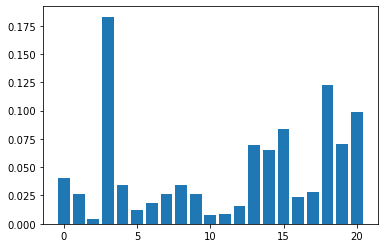

In [15]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

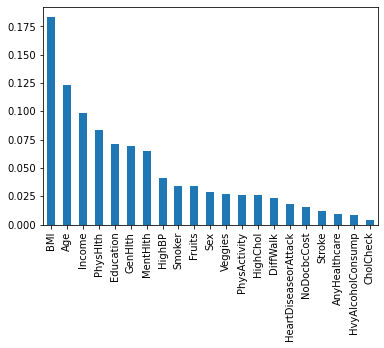

In [16]:
pd.Series(clf.feature_importances_, index=X2_train.columns).sort_values(ascending=False)[:200].plot(kind='bar');

In [17]:
from sklearn.feature_selection import SelectFromModel

In [18]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X2_train, y2_train)
sel.get_support()
# this will give you all of the items that will have the most impact (True or False in terms of impact)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True,  True])

7 features have the most importance: BMI, Age, Income, Physical Health, Education, General Health, Mental Health

In [19]:
FeatureDF = df[['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']]
FeatureDF

,Diabetes_012,BMI,Age,Income,PhysHlth,Education,GenHlth,MentHlth
0,0.0,40.0,9.0,3.0,15.0,4.0,5.0,18.0
1,0.0,25.0,7.0,1.0,0.0,6.0,3.0,0.0
2,0.0,28.0,9.0,8.0,30.0,4.0,5.0,30.0
3,0.0,27.0,11.0,6.0,0.0,3.0,2.0,0.0
4,0.0,24.0,11.0,4.0,0.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...
253675,0.0,45.0,5.0,7.0,5.0,6.0,3.0,0.0
253676,2.0,18.0,11.0,4.0,0.0,2.0,4.0,0.0
253677,0.0,28.0,2.0,2.0,0.0,5.0,1.0,0.0
253678,0.0,23.0,7.0,1.0,0.0,5.0,3.0,0.0


In [20]:
X3 = FeatureDF.drop("Diabetes_012", axis=1)
y3 = FeatureDF['Diabetes_012']

In [21]:
# Split the data into X_train, X_test, y_train, y_test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [22]:
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X3_train, y3_train)

In [23]:
print(f'Training Score: {clf.score(X3_train, y3_train)}')
print(f'Testing Score: {clf.score(X3_test, y3_test)}')

Training Score: 0.9419215809944287
Testing Score: 0.8280353200883003


In [24]:
# Print DataFrame Features
X3

,BMI,Age,Income,PhysHlth,Education,GenHlth,MentHlth
0,40.0,9.0,3.0,15.0,4.0,5.0,18.0
1,25.0,7.0,1.0,0.0,6.0,3.0,0.0
2,28.0,9.0,8.0,30.0,4.0,5.0,30.0
3,27.0,11.0,6.0,0.0,3.0,2.0,0.0
4,24.0,11.0,4.0,0.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...
253675,45.0,5.0,7.0,5.0,6.0,3.0,0.0
253676,18.0,11.0,4.0,0.0,2.0,4.0,0.0
253677,28.0,2.0,2.0,0.0,5.0,1.0,0.0
253678,23.0,7.0,1.0,0.0,5.0,3.0,0.0


#### Based on these 7 features, we were able to gather the following data from Marshmallow:
- **BMI: 73** 
- **Age: 6** 
    - 6 == Age 45 to 49 == 48 human years == 12yrs old in Panda years
- **Income: 8** 
    - Greater than or equal to 75,000
- **Physical Health: 6** 
    - Worked out 6 days within the last 30 days
- **Education: 5** 
    - GED with some college
- **General Health:** 1
    - 1 is excellent, 5 is poor
- **Mental Health: 29**
    - Suffered poor mental health the past 29 days out of 30

In [25]:
# Do a prediction
marshmallow_data = [[73, 6, 8, 6, 5, 1, 29]]
predicted_class = clf.predict(marshmallow_data)
print(predicted_class)

[0.]


### Based on our prediction using Random Forest with Feature Selection, Marshmallow is not diabetic!!!